<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/QUIZ1_2341720205_Charellino_Kalingga_Sadewo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [25]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed
print("1. Dataset Information")
df.info()

print("\n" + "="*30 + "\n")

# In the original dataset, missing values are often represented by '?'.
# replace them with NaN to count them properly.
import numpy as np
df.replace('?', np.nan, inplace=True)

# 2. Which variable(s) has missing values? How many is it?
print("2. Missing Values Count ")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

1. Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


2. Missing Values Count 
workclass         2799
occupation        28

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [30]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

# 1. Perform data imputation on missing values.

print("1. Data imputation on missing values")
for col in ['workclass', 'occupation', 'native-country']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Missing values in '{col}' imputed with mode: '{mode_val}'")

print("\n" + "="*30 + "\n")

# 2. Verified the missing values for each variable. Is it still there?
print("2.  Missing Values Count After Imputation")
remaining_missing = df.isnull().sum().sum()

if remaining_missing == 0:
    print("Verification successful: There are no more missing values in the dataset.")
else:
    print(f"Verification failed: There are still {remaining_missing} missing values.")

1. Data imputation on missing values
Missing values in 'workclass' imputed with mode: 'Private'
Missing values in 'occupation' imputed with mode: 'Prof-specialty'
Missing values in 'native-country' imputed with mode: 'United-States'


2.  Missing Values Count After Imputation
Verification successful: There are no more missing values in the dataset.


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [35]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

print("Inspecting Categorical Variables")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

print("\nNo typos or inappropriate values requiring correction were found.")

Inspecting Categorical Variables

Unique values in 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in 'race':
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

1. Histogram for age


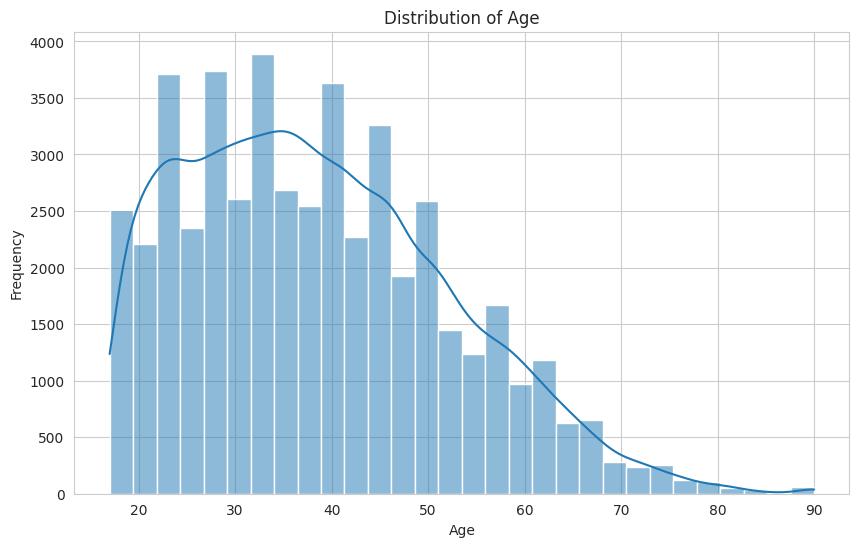

In [40]:
# Answer 1.1 - Histrogram
# Set style for plots
sns.set_style("whitegrid")

print("1. Histogram for age")
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. Bar Chart for education


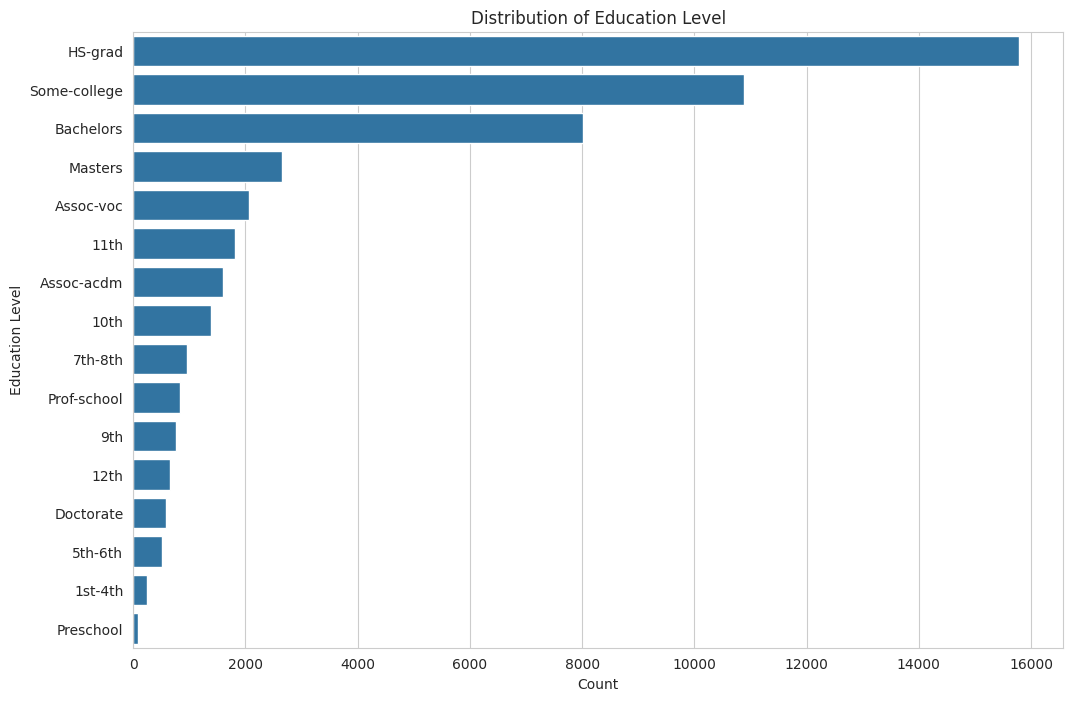

In [41]:
# Answer 1.2 - Barchart
print("2. Bar Chart for education")
plt.figure(figsize=(12, 8))
sns.countplot(y=df['education'], order=df['education'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


3. Box Plot for 'hours_per_week' grouped by income


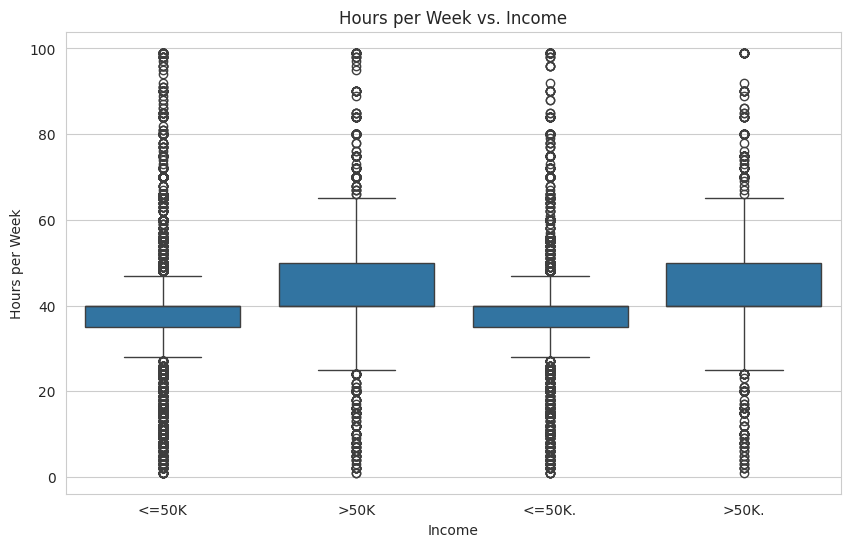

In [44]:
# Answer 1.3 - Boxplot
print("3. Box Plot for 'hours_per_week' grouped by income")
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

4. Line Plot for age vs capital-gain and capital-loss


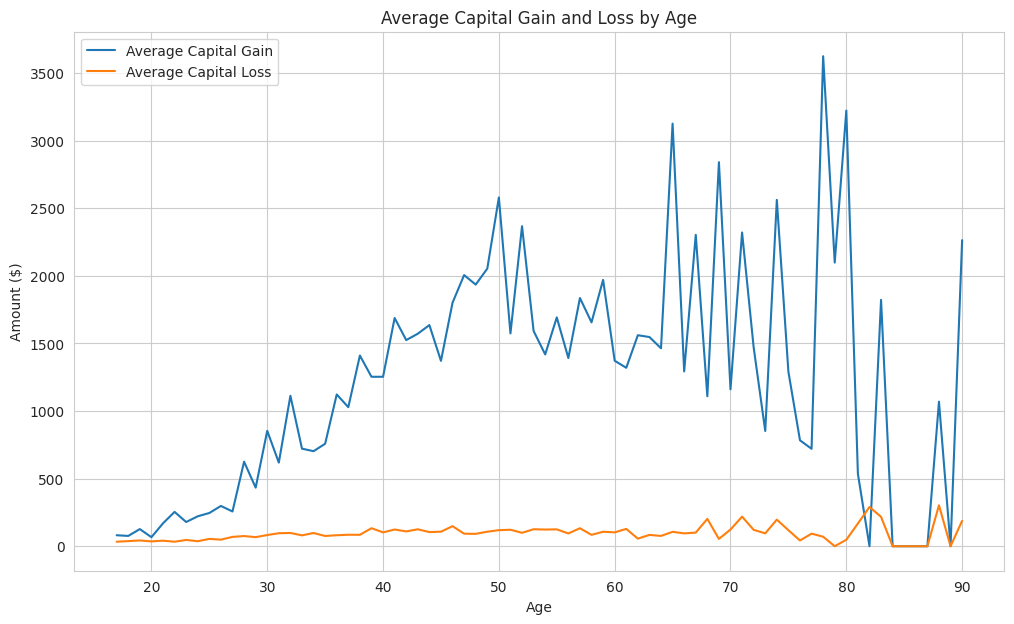

In [46]:
# Answer 1.4 - Lineplot
print("4. Line Plot for age vs capital-gain and capital-loss")
age_analysis = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.plot(age_analysis['age'], age_analysis['capital-gain'], label='Average Capital Gain')
plt.plot(age_analysis['age'], age_analysis['capital-loss'], label='Average Capital Loss')
plt.title('Average Capital Gain and Loss by Age')
plt.xlabel('Age')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [53]:
# Answer with python comment like this -> inline comment

'''
  Or by using multiple
  line comments like this
'''

# 1. What kind of distribution showed in 'age'?
'''
The histogram of 'age' shows a right-skewed distribution (or positively skewed).
This means the tail of the distribution extends towards the higher age values,
with the majority of individuals concentrated in the younger to middle-age range.
'''


# 2. If you find missing values in 'age', what kind of data impute method will you use? Why?
'''
Since the 'age' distribution is skewed, the median would be the best simple imputation method.
The mean is sensitive to outliers and the skewness of the data, which would result in
an imputed value that is higher than the typical age. The median, representing the
50th percentile, is a more robust measure of central tendency for skewed distributions.
'''

# 3. How many outlier for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?
# Define outliers as data points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

def count_outliers(data, group_col, value_col):
    for group in data[group_col].unique():
        group_data = data[data[group_col] == group][value_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
        print(f"Number of outliers for income group '{group}': {len(outliers)}")

count_outliers(df, 'income', 'hours-per-week')

# Based on the calculation, both income categories have a significant number of outliers.
# The '<=50K' category has more outliers than the '>50K' category. This is visible
# in the boxplot, where many data points for both groups lie outside the whiskers,
# especially for those working very few or very many hours per week.

Number of outliers for income group '<=50K': 7809
Number of outliers for income group '>50K': 510
Number of outliers for income group '<=50K.': 3897
Number of outliers for income group '>50K.': 271


"Based on the calculation, both income categories have a significant number of outliers.\nThe '<=50K' category has more outliers than the '>50K' category. This is visible\nin the boxplot, where many data points for both groups lie outside the whiskers,\nespecially for those working very few or very many hours per week.\n\n"

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [58]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Create copies for encoding to preserve original dataframe
df_encoded = df.copy()

# Encode 'Sex' using map: Female -> 0, Male -> 1
df_encoded['sex'] = df_encoded['sex'].map({'Female': 0, 'Male': 1})

# Encode the target variable 'income': <=50K -> 0, >50K -> 1
df_encoded['income'] = df_encoded['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


print("--- Encoded 'sex' variable (first 5 values) ---")
print(df_encoded['sex'].head())
print("\n--- Encoded 'income' variable (first 5 values) ---")
print(df_encoded['income'].head())
print("\n--- Value counts for encoded 'income' ---")
print(df_encoded['income'].value_counts())

--- Encoded 'sex' variable (first 5 values) ---
0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

--- Encoded 'income' variable (first 5 values) ---
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

--- Value counts for encoded 'income' ---
income
0    37155
1    11687
Name: count, dtype: int64


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

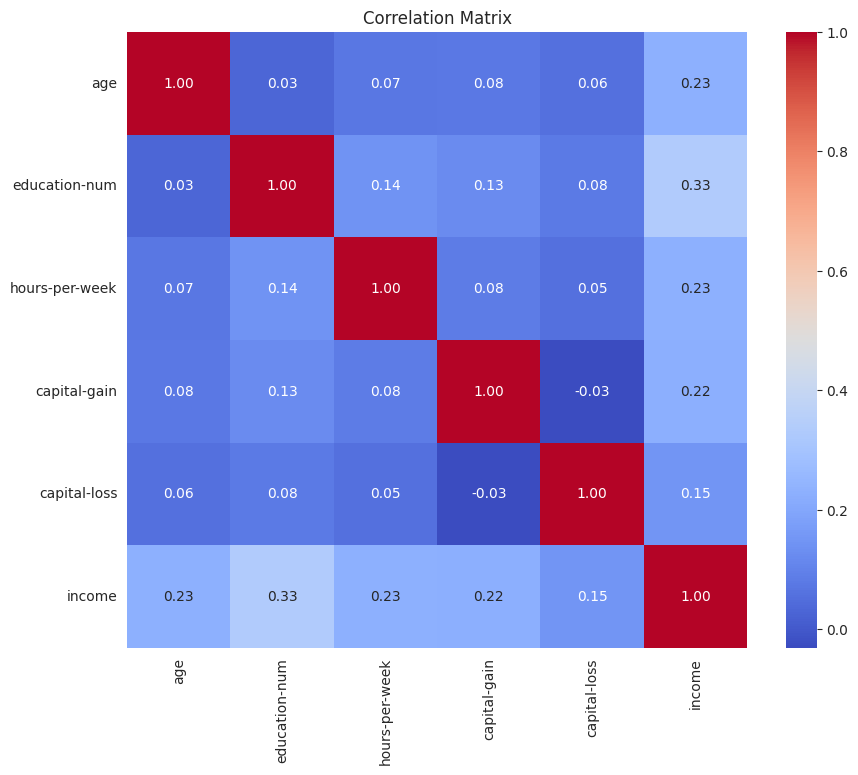

In [59]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# 1. Perform correlation analysis
correlation_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
correlation_matrix = df_encoded[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [60]:
# Answer task 2 using this cell -> you can use multiple comments style too
# 2. Based on the result, what kind of information you get?
'''
From the correlation matrix, we can deduce the following relationships with 'income':
- Positive Correlation: 'age' (0.23), 'education-num' (0.34), 'hours-per-week' (0.23), and
'capital-gain' (0.22) all have a positive correlation with income.
This suggests that as these values increase, the likelihood of having an income >50K also increases.
The strongest positive predictor among these is 'education-num'.

 Near-Zero/Weak Correlation: 'capital-loss' (0.15) has a weaker positive correlation with income.

- Inter-feature Correlation: There are no strong correlations between the predictor variables themselves
(e.g., the highest is 0.13 between 'education-num' and 'hours-per-week'),
which is good as it suggests low multicollinearity.
'''

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [18]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


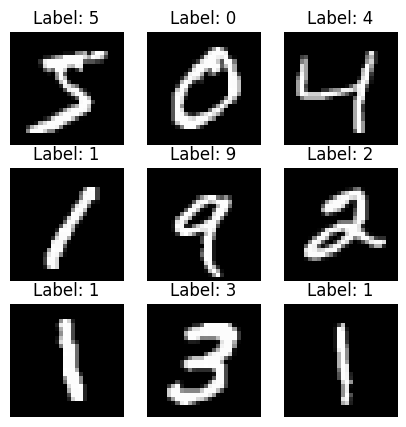

In [19]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

Original shape of X_test: (10000, 28, 28)
New shape of resized X_test: (10000, 32, 32)




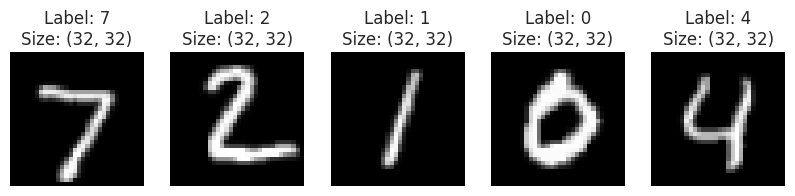

In [69]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

import cv2
# Load data as per the document
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1. Perform upsampling on the test images to 32x32
# Create an empty array to store the resized images [cite: 153, 155]
X_test_resized = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
    # Use cv2.resize for upsampling. INTER_LINEAR is a good default.
    X_test_resized[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

print(f"Original shape of X_test: {X_test.shape}")
print(f"New shape of resized X_test: {X_test_resized.shape}")
print("\n")

# 2. Show the 5 sample of the result.
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_resized[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}\nSize: {X_test_resized[i].shape}")
    plt.axis('off')
plt.show()


## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0


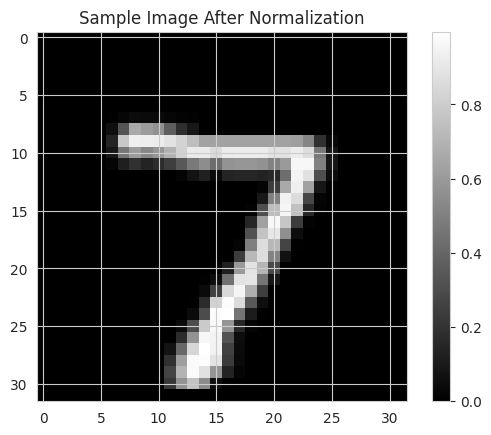

In [70]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

# The pixel values in grayscale images range from 0 (black) to 255 (white).
# To normalize to a [0, 1] range, we divide by the maximum pixel value, which is 255.
X_test_normalized = X_test_resized / 255.0

# Verify the new range
print(f"Minimum pixel value after normalization: {X_test_normalized.min()}")
print(f"Maximum pixel value after normalization: {X_test_normalized.max()}")

# Show a sample normalized image
plt.imshow(X_test_normalized[0], cmap='gray')
plt.title("Sample Image After Normalization")
plt.colorbar()
plt.show()

## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [71]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

# The current shape of each image is (32, 32).
# We need to flatten this into a 1D array of size 32 * 32 = 1024.
# The total number of images is 10,000.
num_images = X_test_normalized.shape[0]
new_dim = X_test_normalized.shape[1] * X_test_normalized.shape[2] # 32 * 32

# Reshape the entire dataset from (10000, 32, 32) to (10000, 1024)
X_test_flattened = X_test_normalized.reshape(num_images, new_dim)

print(f"Shape of dataset before reshaping: {X_test_normalized.shape}")
print(f"Shape of dataset after reshaping: {X_test_flattened.shape}")
print(f"Shape of a single image vector: {X_test_flattened[0].shape}")

Shape of dataset before reshaping: (10000, 32, 32)
Shape of dataset after reshaping: (10000, 1024)
Shape of a single image vector: (1024,)


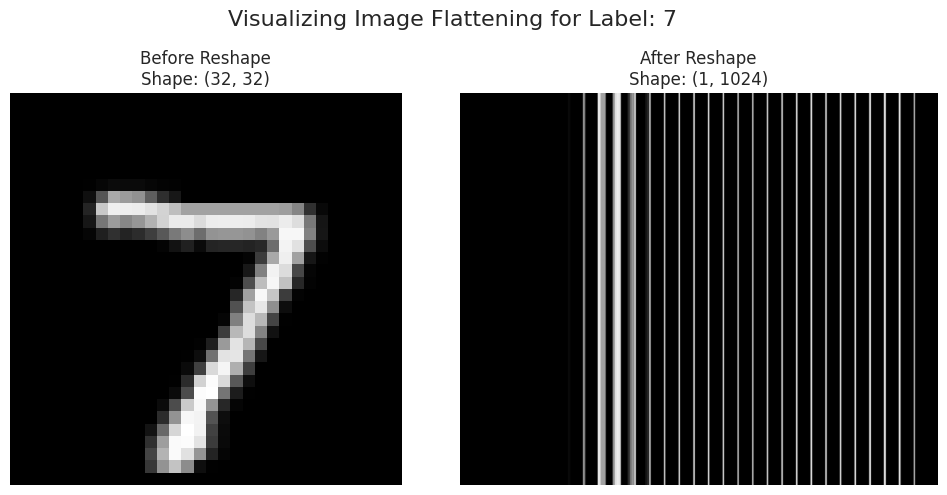

In [76]:
sample_index = 0

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image before reshape (2D array)
axes[0].imshow(X_test_normalized[sample_index], cmap='gray')
axes[0].set_title(f"Before Reshape\nShape: {X_test_normalized[sample_index].shape}")
axes[0].axis('off')

# Image after reshape (visualized as a 1x1024 array)
axes[1].imshow(X_test_flattened[sample_index].reshape(1, new_dim), cmap='gray', aspect='auto')
axes[1].set_title(f"After Reshape\nShape: (1, {new_dim})")
axes[1].axis('off')

plt.suptitle(f"Visualizing Image Flattening for Label: {y_test[sample_index]}", fontsize=16)

plt.tight_layout()
plt.show()